# Exercise 5.10: Period of an anhormic oscillator

The simple harmonic oscillator crops up in many places. Its behavior can be studied readily using analytic methods and it has the important property that its period of oscillation is a constant, independent of its amplitude, making it useful, for instance, for keeping time in watches and clocks. 

Frequently in physics, however, we also come across anharmonic oscillators, whose period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential well. When distrurbed, the particle will rock back and forth in the well.

The harmonic oscillator corresponds toa quadratic potential $V(x) \propto x^2$. Any other from gives an anharmonic oscillator. (Thus there are many different kinds of anharmonic oscillator, depending on the exact form of the potential.)

One way to calculate the motion of an oscillator is to write down the equation for the conservation of energy in the system. If the particla has mass $m$ and position $x$, then the total energy is equal to the sum of the kinetic and potential energies thus:

$$ E = \frac{1}{2}m\bigg(\frac{\text{d}x}{\text{d}t}\bigg)^2 + V(x).$$

Since the energy must be constant over time, this equation is effectively a (nonlinear) differential equation linking $x$ and $t$. 

Let us assum that the potential $V(x)$ is symmetric about $x=0$ and let us our anharmonic oscillator going with amplitude $a$. That is, at $t=0$ we release it from rest at position $x=a$ and it swings back towards the origin. Then at $t=0$ we have $\text{d}x/\text{d}t=0$ and the equation above reads $E=V(a)$, which givese us the total energy of the particle in terms of the amplitude

a) When the particle reaches the origing fro the first time, it has gone through one quarter of a period of the oscillator. By rearranging the equation above for $\text{d}x/\text{d}t$ and then integrating with respect to $t$ from 0 to $\frac{1}{4}T$, show that the period $T$ is given by 

$$ T = \sqrt{8m}\int^a_0 \frac{\text{d}x}{\sqrt{V(a)-V(x)}}$$

Start with 

$ E = \frac{1}{2}m\frac{dx}{dt}^2 + V(x)$ 

we want a derivation of T so rewrite as:

$\frac{dx}{dt}^2 = \frac{2(E-V(x))}{m}$

$\frac{dx}{dt} = \sqrt{\frac{2}{m}}\sqrt{E-V(x)}$

$\frac{dt}{dx} = \sqrt{\frac{m}{2}}\frac{1}{\sqrt{E-V(x)}}$

Given that the energy is completely in potential energy at $t=0$ and $x=a$ we can set $E=V(a)$

$\frac{dt}{dx} = \sqrt{\frac{m}{2}}\frac{1}{\sqrt{V(a)-V(x)}}$

we find that $T/4$ should be:
$\frac{T}{4} = \sqrt{\frac{m}{2}}\int^a_0\frac{1}{\sqrt{V(a)-V(x)}}$

multiplying both sides by 4 we get:
$T = \sqrt{8m}\int^a_0\frac{1}{\sqrt{V(a)-V(x)}}$

which is what we wanted.

b) Suppose the potential is $V(x)=x^4$ and the mass of hte particle is $m=1$. Write a Python function that calculates the period of the oscillator for given amplitude $a$ using Gaussian quadrature with $N=20$ points, then use your function to make a graph of the period for amplitudes ranging from $a=0$ to $a=2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gaussxw import gaussxwab

In [24]:
m = 1
N = 20
start = 0
amplitudes = np.linspace(0.2, 2, N)

In [25]:
def f(x, amplitude):
    return np.sqrt(8*m)*(1/(amplitude**4-x**4))

In [26]:
def gauss_quad(f, a, b, N):
    
    x, w = gaussxwab(N, a, b)
    I = 0
    for k in range(N):
        I += w[k]*f(x[k], b)
    return I

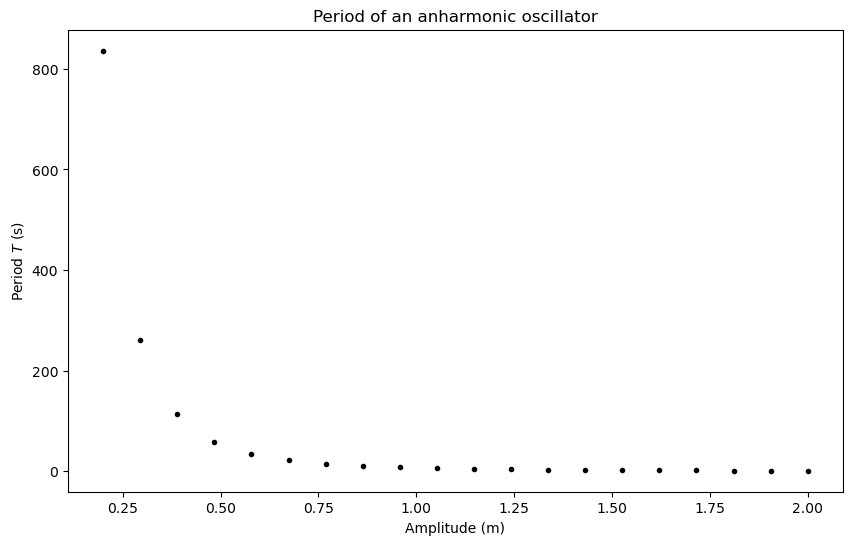

In [27]:
T = []

for amplitude in amplitudes:
    T.append(gauss_quad(f, start, amplitude, N))

plt.figure(figsize=(10,6))
plt.title("Period of an anharmonic oscillator")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period $T$ (s)")
plt.plot(amplitudes, T,'k.')
plt.show()

c) You should find that the oscillator gets faster as the amplitude increases, even though the patricle has further to travel for larger amplitude. And you should find that the period diverges as the amplitude goes to zero. How do you explain these results?

If we decrease the amplitude the total amount of energy $E$ in the system decreases. So with less total energy the maximum speed achievable also decreases as the energy is converted from potential energy $V$ to kinetic energy $\frac{1}{2}mv^2$. So as $a \rightarrow 0$, $v \rightarrow 0$ so the period $T$ will behave as $T \rightarrow \infty$.